#Download Dataset

In [ ]:
# Download kaggle.json terlebih dahulu kemudian upload di directory terserah
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d adefiqri12/riceleafsv3

 97% 297M/307M [00:04<00:00, 70.4MB/s]
100% 307M/307M [00:04<00:00, 68.3MB/s]


In [ ]:
import zipfile

# Extract the archive
local_zip = '/content/riceleafsv3.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = '/content/RiceLeafsv3/train'
test_dir = '/content/RiceLeafsv3/validation'

#Baca Gambar dan Tampilkan

In [ ]:
import os

bacterial_leaf_blight_dir = os.path.join(train_dir, 'bacterial_leaf_blight')
brown_spot_dir = os.path.join(train_dir, 'brown_spot')
healthy_dir = os.path.join(train_dir, 'healthy')
leaf_blast_dir = os.path.join(train_dir, 'leaf_blast')
leaf_scald_dir = os.path.join(train_dir, 'leaf_scald')
narrow_brown_spot_dir = os.path.join(train_dir, 'narrow_brown_spot')

print('total training bacterial_leaf_blight images:', len(os.listdir(bacterial_leaf_blight_dir)))
print('total training brown_spot images:', len(os.listdir(brown_spot_dir)))
print('total training healthy images:', len(os.listdir(healthy_dir)))
print('total training leaf_blast images:', len(os.listdir(leaf_blast_dir)))
print('total training leaf_scald images:', len(os.listdir(leaf_scald_dir)))
print('total training narrow_brown_spot images:', len(os.listdir(narrow_brown_spot_dir)))

bacterial_leaf_blight_files = os.listdir(bacterial_leaf_blight_dir)
print(bacterial_leaf_blight_files[:10])

brown_spot_files = os.listdir(brown_spot_dir)
print(brown_spot_files[:10])

healthy_files = os.listdir(healthy_dir)
print(healthy_files[:10])

leaf_blast_files = os.listdir(leaf_blast_dir)
print(leaf_blast_files[:10])

leaf_scald_files = os.listdir(leaf_scald_dir)
print(leaf_scald_files[:10])

narrow_brown_spot_files = os.listdir(narrow_brown_spot_dir)
print(narrow_brown_spot_files[:10])

total training bacterial_leaf_blight images: 350
total training brown_spot images: 373
total training healthy images: 371
total training leaf_blast images: 363
total training leaf_scald images: 358
total training narrow_brown_spot images: 352
['bacterial_leaf_blight (277).JPG', 'bacterial_leaf_blight (2).JPG', 'bacterial_leaf_blight (319).JPG', 'bacterial_leaf_blight (349).JPG', 'bacterial_leaf_blight (183).jpg', 'bacterial_leaf_blight (36).JPG', 'bacterial_leaf_blight (66).JPG', 'bacterial_leaf_blight (70).JPG', 'bacterial_leaf_blight (175).JPG', 'bacterial_leaf_blight (115).JPG']
['brown_spot (54).jpg', 'brown_spot (3).jpg', 'brown_spot (76).jpg', 'brown_spot (292).jpg', 'brown_spot (32).jpg', 'brown_spot (232).JPG', 'brown_spot (23).jpg', 'brown_spot (287).jpg', 'brown_spot (67).jpg', 'brown_spot (52).jpg']
['healthy (207).jpg', 'healthy (53).jpg', 'healthy (241).jpg', 'healthy (148).jpg', 'healthy (55).jpg', 'healthy (325).jpg', 'healthy (218).jpg', 'healthy (50).jpg', 'healthy (22

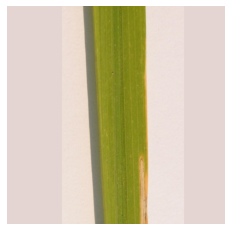

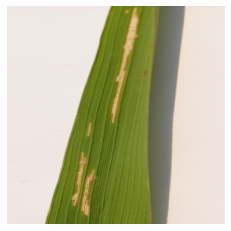

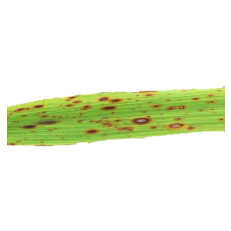

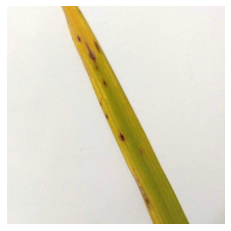

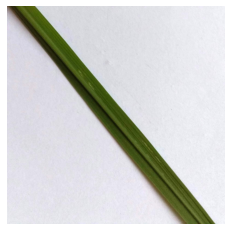

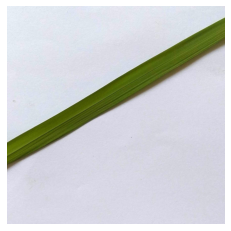

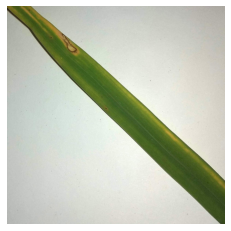

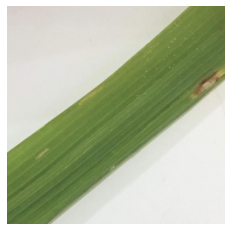

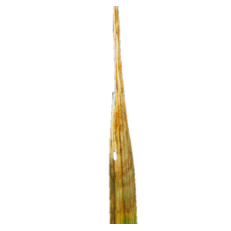

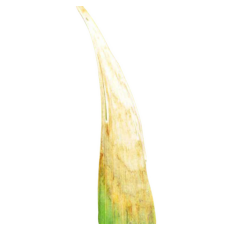

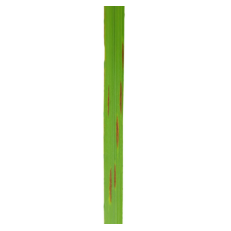

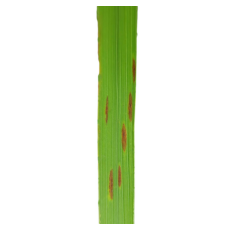

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_bacterial_leaf_blight = [os.path.join(bacterial_leaf_blight_dir, fname) 
                for fname in bacterial_leaf_blight_files[pic_index-2:pic_index]]
next_brown_spot = [os.path.join(brown_spot_dir, fname) 
                for fname in brown_spot_files[pic_index-2:pic_index]]
next_healthy = [os.path.join(healthy_dir, fname) 
                for fname in healthy_files[pic_index-2:pic_index]]
next_leaf_blast = [os.path.join(leaf_blast_dir, fname) 
                for fname in leaf_blast_files[pic_index-2:pic_index]]
next_leaf_scald = [os.path.join(leaf_scald_dir, fname) 
                for fname in leaf_scald_files[pic_index-2:pic_index]]
next_narrow_brown_spot = [os.path.join(narrow_brown_spot_dir, fname) 
                for fname in narrow_brown_spot_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_bacterial_leaf_blight+next_brown_spot+next_healthy+next_leaf_blast+next_leaf_scald+next_narrow_brown_spot):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

#Model CNN Mandiri

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

#Processing Augmentasi Gambar

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_dir
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True)

VALIDATION_DIR = test_dir
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

Found 2167 images belonging to 6 classes.
Found 543 images belonging to 6 classes.


In [ ]:
# Set the training parameters
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-04)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Training Model

In [ ]:
initial_epoch = 40

In [ ]:
# Train the model

his = model.fit(train_generator, epochs=initial_epoch, validation_data = validation_generator)

Epoch 1/40
68/68 [==============================] - 106s 1s/step - loss: 2.4023 - accuracy: 0.2875 - val_loss: 1.8384 - val_accuracy: 0.5157
Epoch 2/40
68/68 [==============================] - 91s 1s/step - loss: 1.6850 - accuracy: 0.5048 - val_loss: 1.5273 - val_accuracy: 0.5304
Epoch 3/40
68/68 [==============================] - 91s 1s/step - loss: 1.3332 - accuracy: 0.6341 - val_loss: 1.2255 - val_accuracy: 0.6630
Epoch 4/40
68/68 [==============================] - 91s 1s/step - loss: 1.1726 - accuracy: 0.6844 - val_loss: 1.1200 - val_accuracy: 0.7293
Epoch 5/40
68/68 [==============================] - 89s 1s/step - loss: 1.0687 - accuracy: 0.7088 - val_loss: 1.0534 - val_accuracy: 0.7145
Epoch 6/40
68/68 [==============================] - 89s 1s/step - loss: 0.9622 - accuracy: 0.7439 - val_loss: 0.9410 - val_accuracy: 0.7477
Epoch 7/40
68/68 [==============================] - 90s 1s/step - loss: 0.9580 - accuracy: 0.7370 - val_loss: 0.9403 - val_accuracy: 0.7532
Epoch 8/40
68/68 [=

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# Model Prediction

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=26)
  print(classes)

In [ ]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']

loss = his.history['loss']
val_loss = his.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, 'r', label='Training Accuracy')
plt.plot(val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, 'r', label='Training Loss')
plt.plot(val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
fine_tune_epochs = 20
total_epochs =  initial_epoch + fine_tune_epochs

history_fine = model.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch=his.epoch[-1],
                         validation_data=validation_generator)

Epoch 40/60
68/68 [==============================] - 96s 1s/step - loss: 0.4064 - accuracy: 0.8791 - val_loss: 0.3693 - val_accuracy: 0.9079
Epoch 41/60
68/68 [==============================] - 91s 1s/step - loss: 0.3644 - accuracy: 0.8957 - val_loss: 0.4023 - val_accuracy: 0.8766
Epoch 42/60
68/68 [==============================] - 94s 1s/step - loss: 0.4123 - accuracy: 0.8791 - val_loss: 0.3709 - val_accuracy: 0.8877
Epoch 43/60
68/68 [==============================] - 94s 1s/step - loss: 0.3685 - accuracy: 0.8980 - val_loss: 0.4627 - val_accuracy: 0.8619
Epoch 44/60
68/68 [==============================] - 94s 1s/step - loss: 0.3809 - accuracy: 0.8934 - val_loss: 0.4575 - val_accuracy: 0.8729
Epoch 45/60
68/68 [==============================] - 93s 1s/step - loss: 0.4063 - accuracy: 0.8763 - val_loss: 0.4361 - val_accuracy: 0.8637
Epoch 46/60
68/68 [==============================] - 93s 1s/step - loss: 0.3470 - accuracy: 0.8999 - val_loss: 0.4178 - val_accuracy: 0.8637
Epoch 47/60
6

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, 'r', label='Training Accuracy')
plt.plot(val_acc, 'b', label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([initial_epoch-1,initial_epoch-1],
          plt.ylim(), label='Add 20 Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, 'r', label='Training Loss')
plt.plot(val_loss, 'b', label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epoch-1,initial_epoch-1],
         plt.ylim(), label='Add 20 Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/my_model/assets
INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
!zip -r /content/model_test.zip /content/saved_model/my_model

  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 67%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 89%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 92%)
